# TensorFlow Lite 模型生成实验

## 准备工作

按照给的教程进行安装，使用的是Colab 在线文档

In [3]:
!sudo apt-get update -y

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [1,683 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease [24.6 kB]
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,958 kB]
Get:13 http://security.ubuntu.com/ubuntu

In [4]:
!sudo apt-get install python3.9 python3.9-venv python3.9-distutils curl -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
curl is already the newest version (7.81.0-1ubuntu1.20).
The following additional packages will be installed:
  libpython3.9-minimal libpython3.9-stdlib python3.9-lib2to3 python3.9-minimal
Suggested packages:
  binfmt-support
The following NEW packages will be installed:
  libpython3.9-minimal libpython3.9-stdlib python3.9 python3.9-distutils
  python3.9-lib2to3 python3.9-minimal python3.9-venv
0 upgraded, 7 newly installed, 0 to remove and 91 not upgraded.
Need to get 7,815 kB of archives.
After this operation, 23.1 MB of additional disk space will be used.
Get:1 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 libpython3.9-minimal amd64 3.9.22-1+jammy1 [837 kB]
Get:2 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 python3.9-minimal amd64 3.9.22-1+jammy1 [2,072 kB]
Get:3 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 l

In [5]:
!python3.9 -m venv /content/tflite_env

In [6]:
!curl -sS https://bootstrap.pypa.io/get-pip.py -o get-pip.py

In [7]:
!/content/tflite_env/bin/python get-pip.py

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 72.1 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.0.1
    Uninstalling pip-23.0.1:
      Successfully uninstalled pip-23.0.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [pip]


In [8]:
!/content/tflite_env/bin/pip --version

pip 25.1.1 from /content/tflite_env/lib/python3.9/site-packages/pip (python 3.9)


In [9]:
! /content/tflite_env/bin/pip install -q \
  tensorflow==2.10.0 \
  keras==2.10.0 \
  numpy==1.23.5 \
  protobuf==3.19.6 \
  tensorflow-hub==0.12.0 \
  tflite-support==0.4.2 \
  tensorflow-datasets==4.8.3 \
  sentencepiece==0.1.99 \
  sounddevice==0.4.5 \
  librosa==0.8.1 \
  flatbuffers==23.5.26 \
  matplotlib==3.5.3 \
  opencv-python==4.8.0.76

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.1/578.1 MB 19.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 78.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 139.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 68.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 122.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 MB 57.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 131.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 127.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 124.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━

In [10]:
! /content/tflite_env/bin/pip install tflite-model-maker==0.4.2

  Using cached tflite_model_maker-0.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached tf_models_official-2.3.0-py2.py3-none-any.whl.metadata (1.3 kB)
  Using cached fire-0.7.0.tar.gz (87 kB)
  Preparing metadata (setup.py) ... done
  Using cached urllib3-1.25.11-py2.py3-none-any.whl.metadata (41 kB)
  Using cached tensorflowjs-3.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached neural_structured_learning-1.4.0-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached tensorflow_model_optimization-0.8.0-py2.py3-none-any.whl.metadata (904 bytes)
INFO: pip is looking at multiple versions of google-cloud-bigquery to determine which version is compatible with other requirements. This could take a while.
INFO: pip is looking at multiple versions of grpcio-status to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of grpcio-status to determine which version is compatible with other requirements. This c

In [11]:
! /content/tflite_env/bin/pip install matplotlib_inline IPython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 808.2/808.2 kB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 81.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 72.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15/15 [IPython]


In [12]:
! /content/tflite_env/bin/python -c "from tflite_model_maker import image_classifier; print('TFLite Model Maker 已成功导入')"

2025-05-21 00:56:51.922743: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2025-05-21 00:56:51.922781: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/content/tflite_env/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/content/tflite_env/lib/python3.9/site-packages/ten

进行花卉分类训练

In [13]:
# step_train.py
with open('/content/step_train.py', 'w') as f:
    f.write("""
import tensorflow as tf
from tflite_model_maker import image_classifier
from tflite_model_maker.image_classifier import DataLoader

image_path = tf.keras.utils.get_file(
    'flower_photos',
    'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
    untar=True)

data = DataLoader.from_folder(image_path)
train_data, test_data = data.split(0.9)

model = image_classifier.create(train_data)
loss, acc = model.evaluate(test_data)
print(f'✅ 测试准确率: {acc:.4f}')
model.export(export_dir='.')
""")
! /content/tflite_env/bin/python /content/step_train.py



2025-05-21 00:58:42.185292: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2025-05-21 00:58:42.185322: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
/content/tflite_env/lib/python3.9/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/content/tflite_env/lib/python3.9/site-packages/ten

In [ ]:
from google.colab import files
files.download('flower_model.tflite')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

将模型导入实验四进行验证

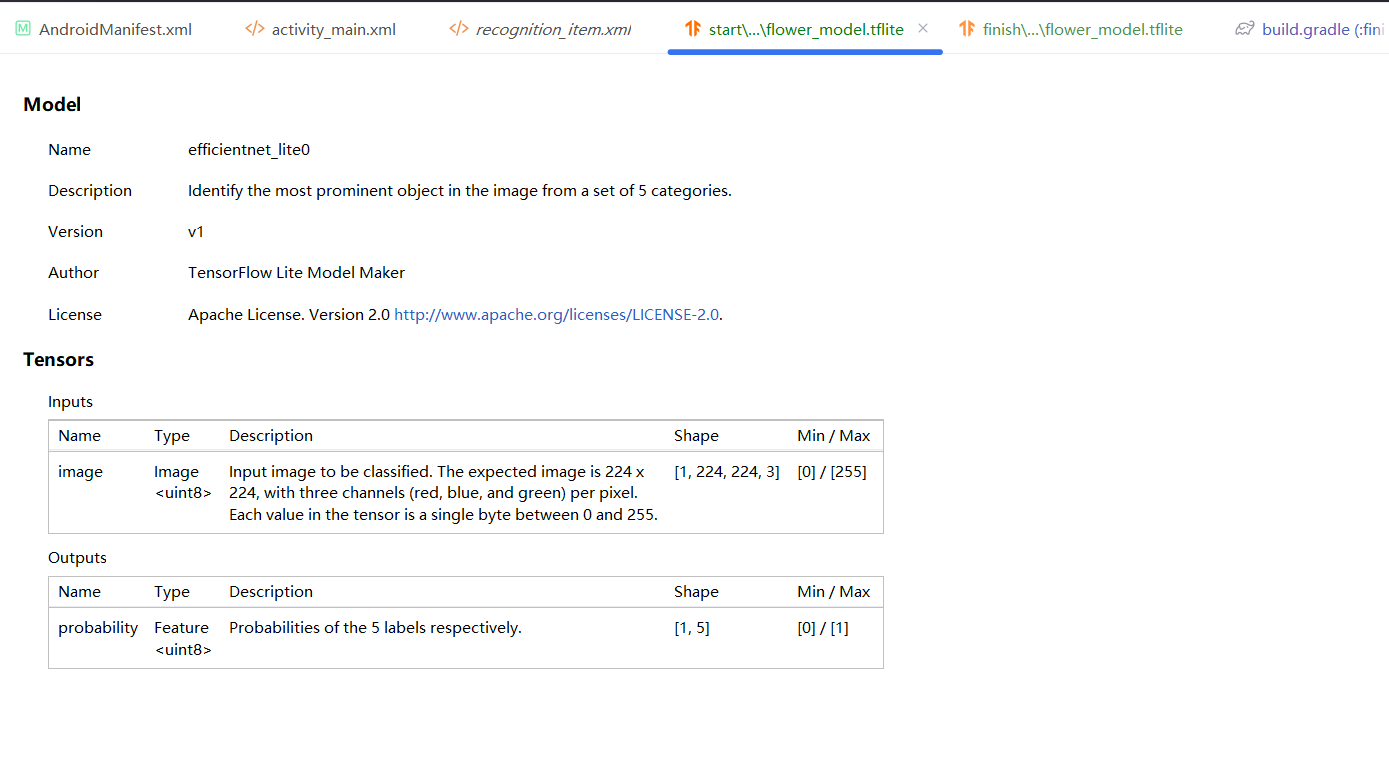

运行结果如图，运行无报错
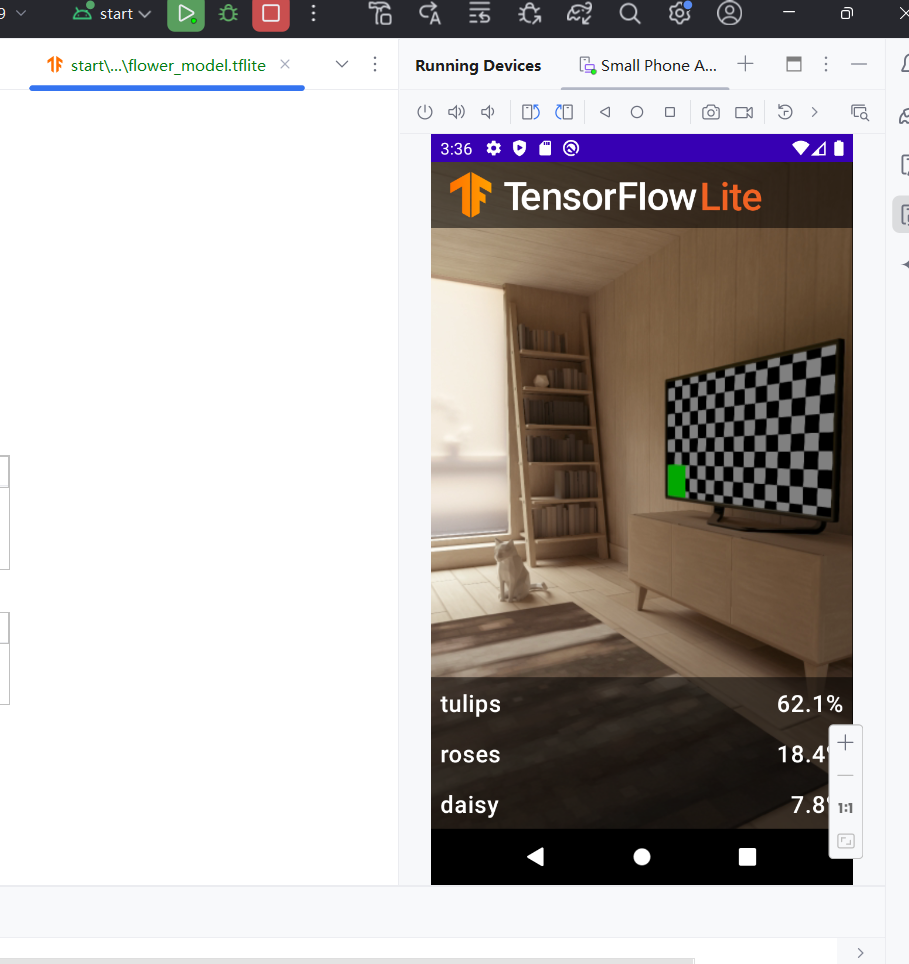

在真机上运行显示结果：


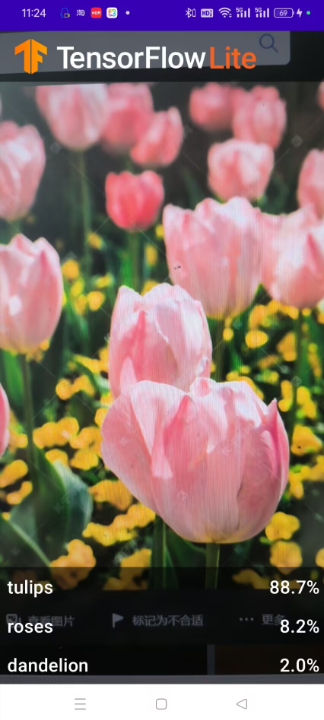